# Flower Recognition using Neural Networks

## Import all models and libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

## Importing dataset

In [5]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128
folder_dir = r'C:\Users\Dhamo\Favorites\Documents\Python projects\Flower detection\Dataset'
for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith(".jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [6]:
data_arr = np.array(data)
label_arr = np.array(label)

In [7]:
len(label)

4327

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

## Splitting dataset for model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [10]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [11]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

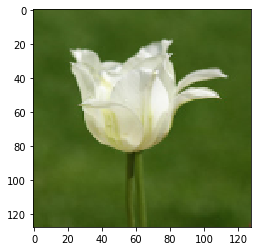

In [12]:
import matplotlib.pyplot as plt
img = plt.imshow(X_train[0])

In [13]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=25
epochs=30

C:\Users\Dhamo\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Fitting the model

In [14]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),epochs = epochs,validation_data = (X_test,y_test),verbose = 1,)

C:\Users\Dhamo\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
139/139 [==============================] - 676s 5s/step - loss: 1.4579 - accuracy: 0.3513 - val_loss: 1.3401 - val_accuracy: 0.4018
Epoch 2/30
139/139 [==============================] - 726s 5s/step - loss: 1.3005 - accuracy: 0.4250 - val_loss: 1.2686 - val_accuracy: 0.4873
Epoch 3/30
139/139 [==============================] - 455s 3s/step - loss: 1.2377 - accuracy: 0.4782 - val_loss: 1.0955 - val_accuracy: 0.5473
Epoch 4/30
139/139 [==============================] - 487s 4s/step - loss: 1.1760 - accuracy: 0.5172 - val_loss: 1.0695 - val_accuracy: 0.5727
Epoch 5/30
139/139 [==============================] - 465s 3s/step - loss: 1.1193 - accuracy: 0.5423 - val_loss: 1.0332 - val_accuracy: 0.6005
Epoch 6/30
139/139 [==============================] - 463s 3s/step - loss: 1.1039 - accuracy: 0.5738 - val_loss: 0.9807 - val_accuracy: 0.6143
Epoch 7/30
139/139 [==============================] - 488s 4s/step - loss: 1.0408 - accuracy: 0.5958 - val_loss: 1.0068 - val_accuracy: 0.6224

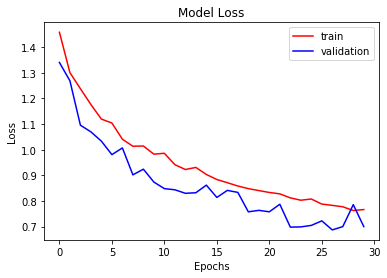

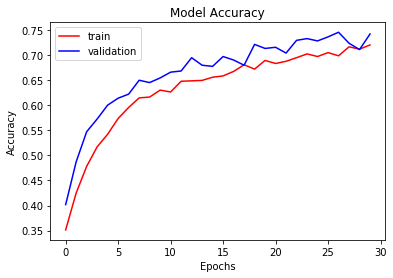

In [15]:
# Loss
plt.plot(history.history['loss'], "r")
plt.plot(history.history['val_loss'], "b")
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], "r")
plt.plot(history.history['val_accuracy'],"b")
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

## Testing the model

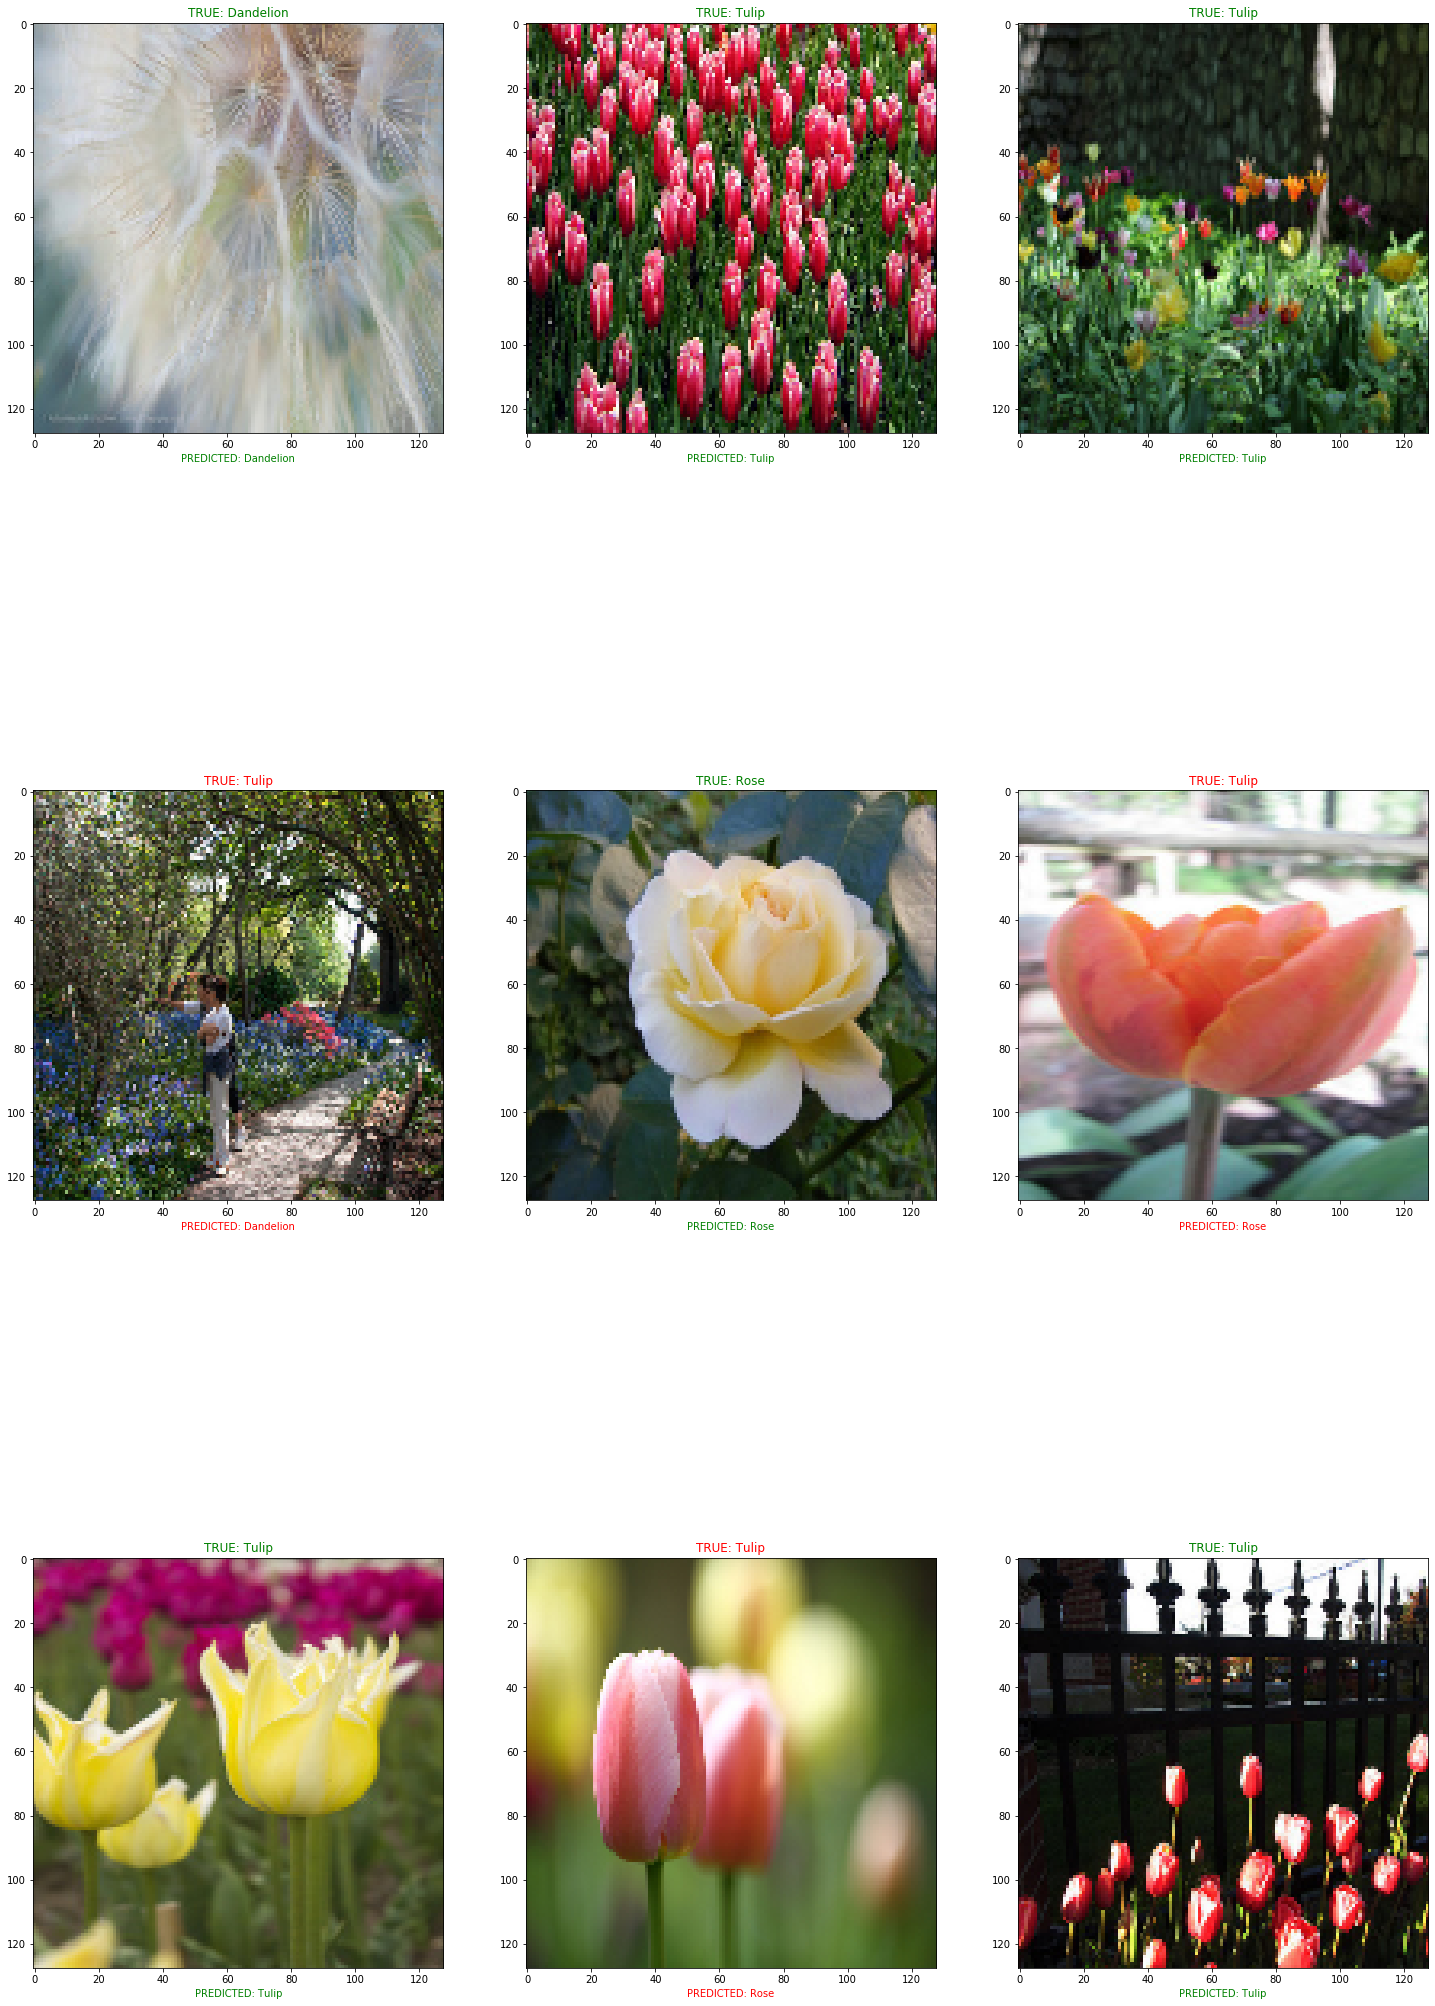

In [23]:
folder_dir = r'C:\Users\Dhamo\Favorites\Documents\Python projects\Flower detection\Dataset'
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(3,3, figsize=(25, 40))

for i in range(3):
    for j in range(3):
        k = int(np.random.random_sample() * len(X_test))
        
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')

In [24]:
pred=model.predict(X_test)
pred_digits=np.argmax(pred,axis=1)
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

## CORRECTLY CLASSIFIED FLOWER IMAGES

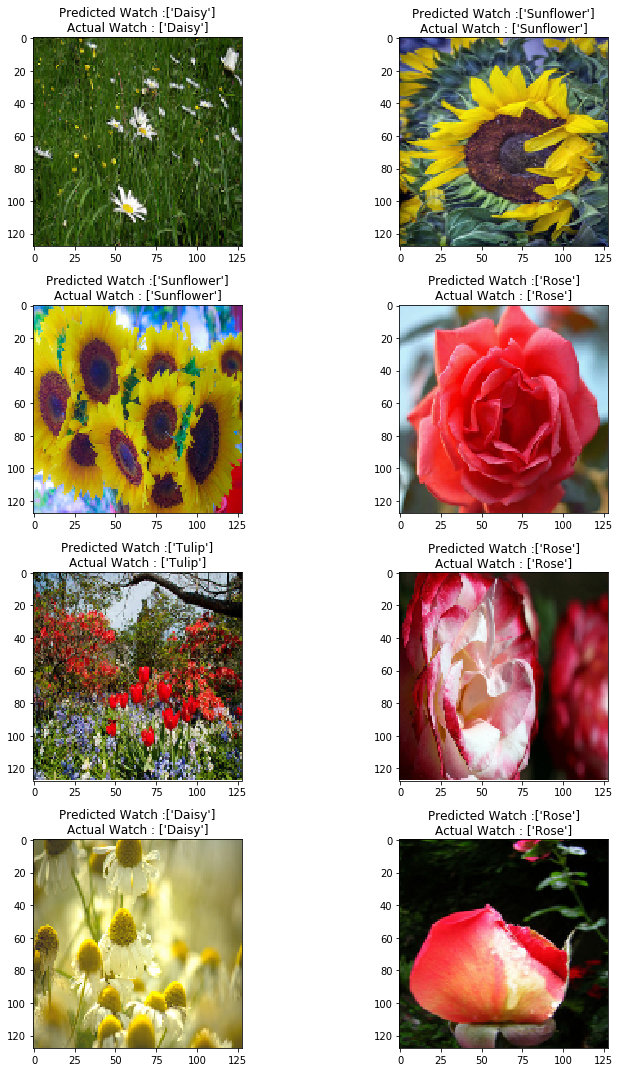

In [27]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(encoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Watch : "+str(encoder.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

## MISCLASSIFIED IMAGES OF FLOWERS

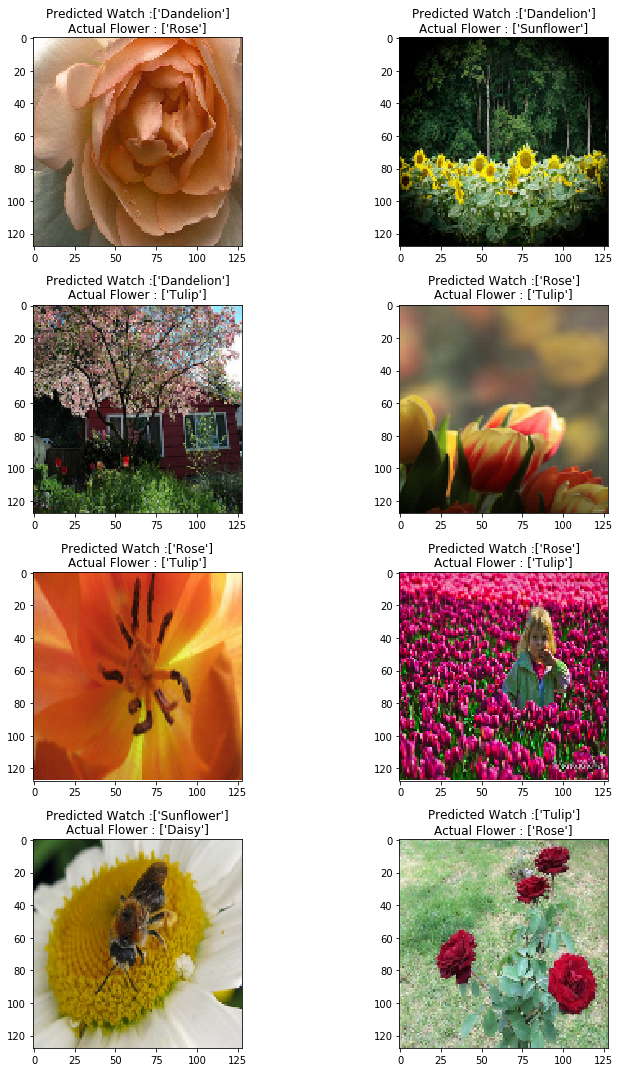

In [28]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(encoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(encoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [29]:
import pickle

In [32]:
pickle.dump(encoder, open('model.pkl','wb'))